## Multiple Linear Regression 
### Bike sharing assignement

#### Problem Statement:
Build a multiple linear regression model for the prediction of demand for shared bikes.
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## PRELIMINARY 
### PERFORM EDA AND DATA UNDERSTANDING 

#### IGNORE WARNING

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

#### IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### READING THE DATA CSV

In [3]:
data = pd.read_csv(r'day.csv')
pd.set_option('max_columns', None)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### NUMBER OF ROWS AND COLUMNS IN DATASET

In [4]:
rows, columns = data.shape
print(f'The dataset has {rows} rows and {columns} columns')

The dataset has 730 rows and 16 columns


#### BASIC INFO ON THE DATASET 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Looking for data duplicates
row, column = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


#### NUMBER OF FEATURES AND PERCENTAGE OF NULL VALUES

In [7]:
# number of numerical and categorical features
num, obj = 0, 0
for feature in data:
    if data[feature].dtype == 'O':
        obj += 1
    else:
        num += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'The dataset has {num} numerical features and {obj} categorical features')

# Percentage of missing values
print('\nPERCENTAGE MISSING VALUES AFTER FILLING:')
c=0
for feature in data:
    if data[feature].isnull().sum()!=0:
        print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
    else:
        c+=1
if c == len(data.columns):print('There is no missing values in the dataset')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 15 numerical features and 1 categorical features

PERCENTAGE MISSING VALUES AFTER FILLING:
There is no missing values in the dataset


#### INFERENCE ON DROP OF IRRELAVANT COLUMNS




- The feature <b>'instant'</b> has no significance in prediction of demand of bikes.
- The feature <b>'dteday'</b> has significance but the same column can be derived from following features 'season	yr	mnth	weekday	'.
- The feature <b>casual & registered</b> this feature has no much significance as we are interested in total count of bikes (ie demand) not by category wise and moreover combination of casual & registered is target 'cnt'. 



Hence above highlighted  columns will be dropped.

In [8]:
## dropping the decided columns 
del data['instant']
del data['dteday']
del data['casual']
del data['registered']

In [9]:
rows, columns = data.shape
print(f'The dataset has {rows} rows and {columns} columns')

The dataset has 730 rows and 12 columns


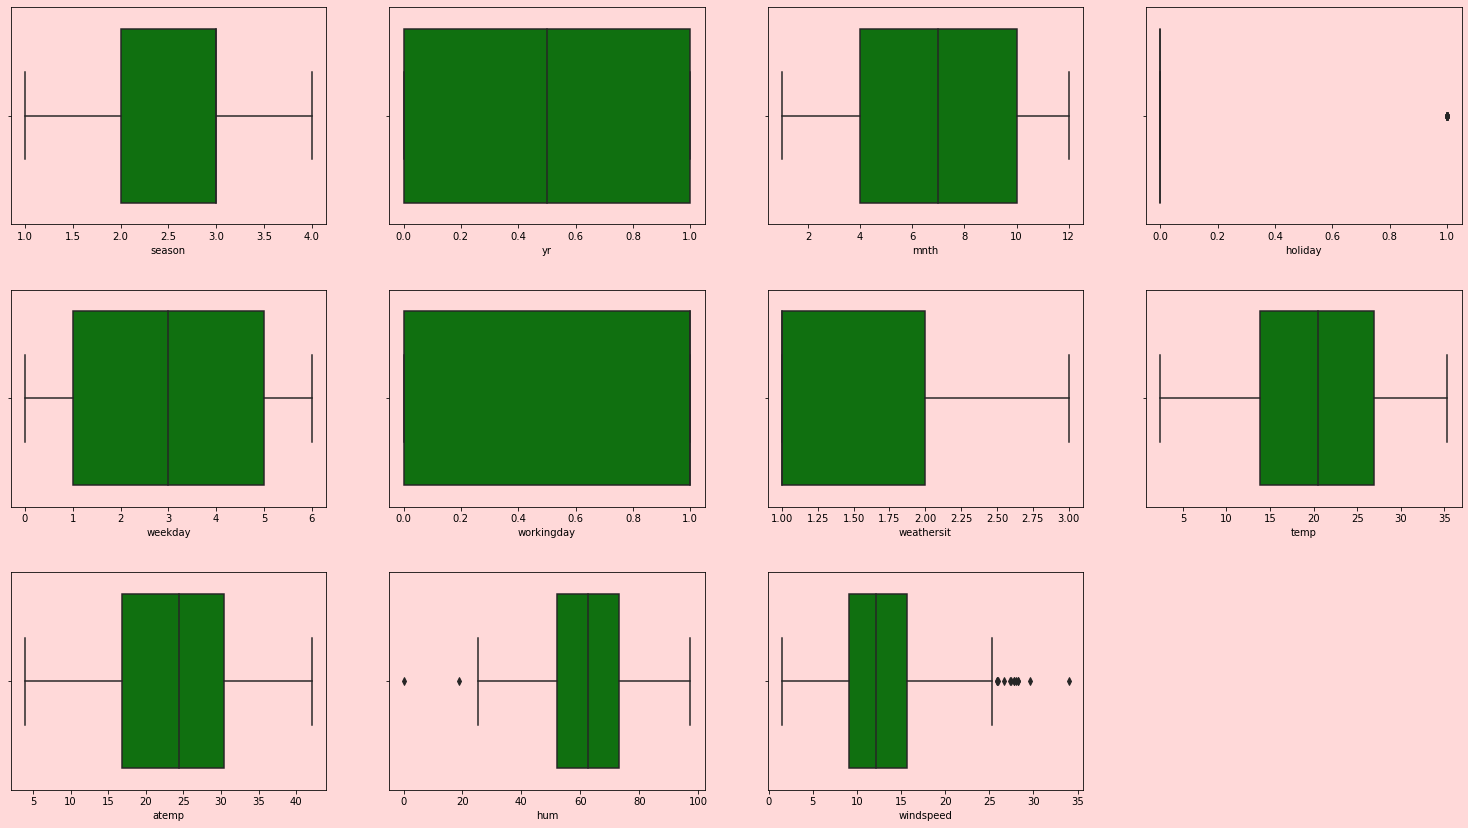

In [10]:
#Creating subplots
fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(6,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11, 
       sec_12]
cnt = 0
for feature in data:
    if data[feature].dtype=='O' or feature=='cnt':
        continue
    else:
        sns.boxplot(x=data[feature], ax=sec[cnt], color='green')
        cnt+=1
# Removing axis and spines
for sec in [sec_12]:
    for location in ['top', 'right', 'bottom','left']:
        sec.spines[location].set_visible(False)
        sec.xaxis.set_visible(False)
        sec.yaxis.set_visible(False)


###### We can see clear outliers on feature 'holiday' ,'hum','windspeed'

Text(0.5, 1.0, 'DISTRIBUTION BEFORE OUTLIER REMOVAL - HOLIDAY')

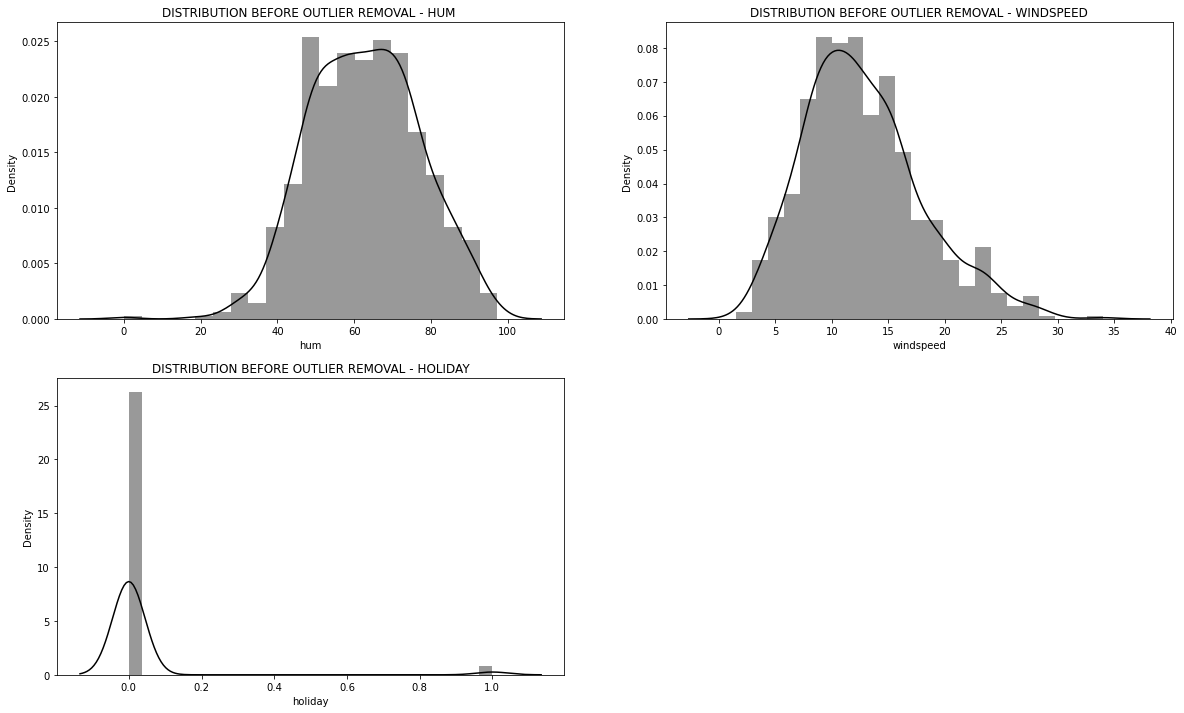

In [11]:
# Removing the data above 99% in upper fence of annual income

# Distribution plot before outlier removal
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
ax = sns.distplot(data['hum'], color='black')
ax.set_title('DISTRIBUTION BEFORE OUTLIER REMOVAL - HUM ')

plt.subplot(2,2,2)
ax = sns.distplot(data['windspeed'], color='black')
ax.set_title('DISTRIBUTION BEFORE OUTLIER REMOVAL - WINDSPEED')


plt.subplot(2,2,3)
ax = sns.distplot(data['holiday'], color='black')
ax.set_title('DISTRIBUTION BEFORE OUTLIER REMOVAL - HOLIDAY')

###### We can see 'windspeed' and 'holiday' is right skewed and 'hum' is left skewed

#### OUTLIER TRATMENT

In [12]:
outlier_feature_moretha2=['hum','windspeed']
outlier_feature_lesstha2=['holiday']   #less than 2 values its better we take different approach
for feature in outlier_feature_moretha2:
    if data[feature].dtype!='O' and len(data[feature].unique())>2:
        lower_quartile = data[feature].quantile(0.25)
        upper_quartile = data[feature].quantile(0.75)
        IQR = upper_quartile - lower_quartile
        lower_fence = lower_quartile - (1.5*IQR)
        upper_fence = upper_quartile + (1.5*IQR)
        
        data[feature] = np.where(data[feature]>upper_fence, 
                                upper_fence, 
                                data[feature])
        
        data[feature] = np.where(data[feature]<lower_fence,
                               lower_fence,
                               data[feature])
for feature in outlier_feature_lesstha2:
    if data[feature].dtype!='O' and len(data[feature].unique())<=2:
        data[feature] = data[feature].mode()

Text(0.5, 1.0, 'DISTRIBUTION AFTER OUTLIER REMOVAL - HOLIDAY')

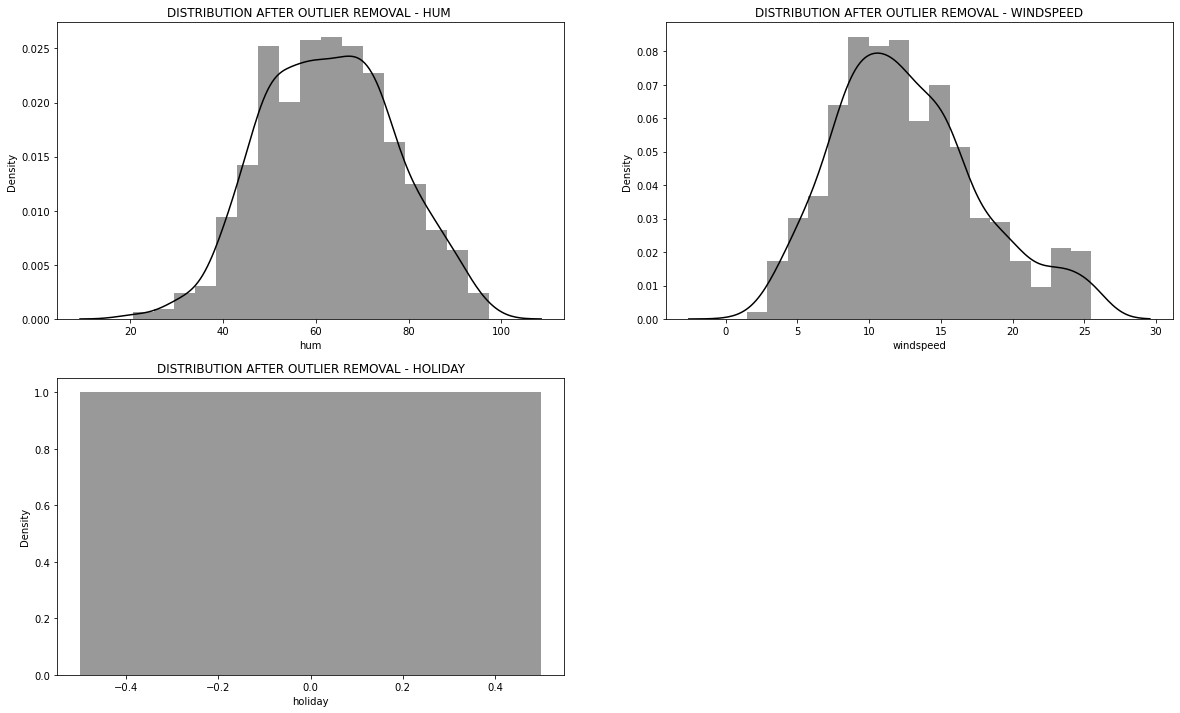

In [13]:

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
ax = sns.distplot(data['hum'], color='black')
ax.set_title('DISTRIBUTION AFTER OUTLIER REMOVAL - HUM ')

plt.subplot(2,2,2)
ax = sns.distplot(data['windspeed'], color='black')
ax.set_title('DISTRIBUTION AFTER OUTLIER REMOVAL - WINDSPEED')


plt.subplot(2,2,3)
ax = sns.distplot(data['holiday'], color='black')
ax.set_title('DISTRIBUTION AFTER OUTLIER REMOVAL - HOLIDAY')

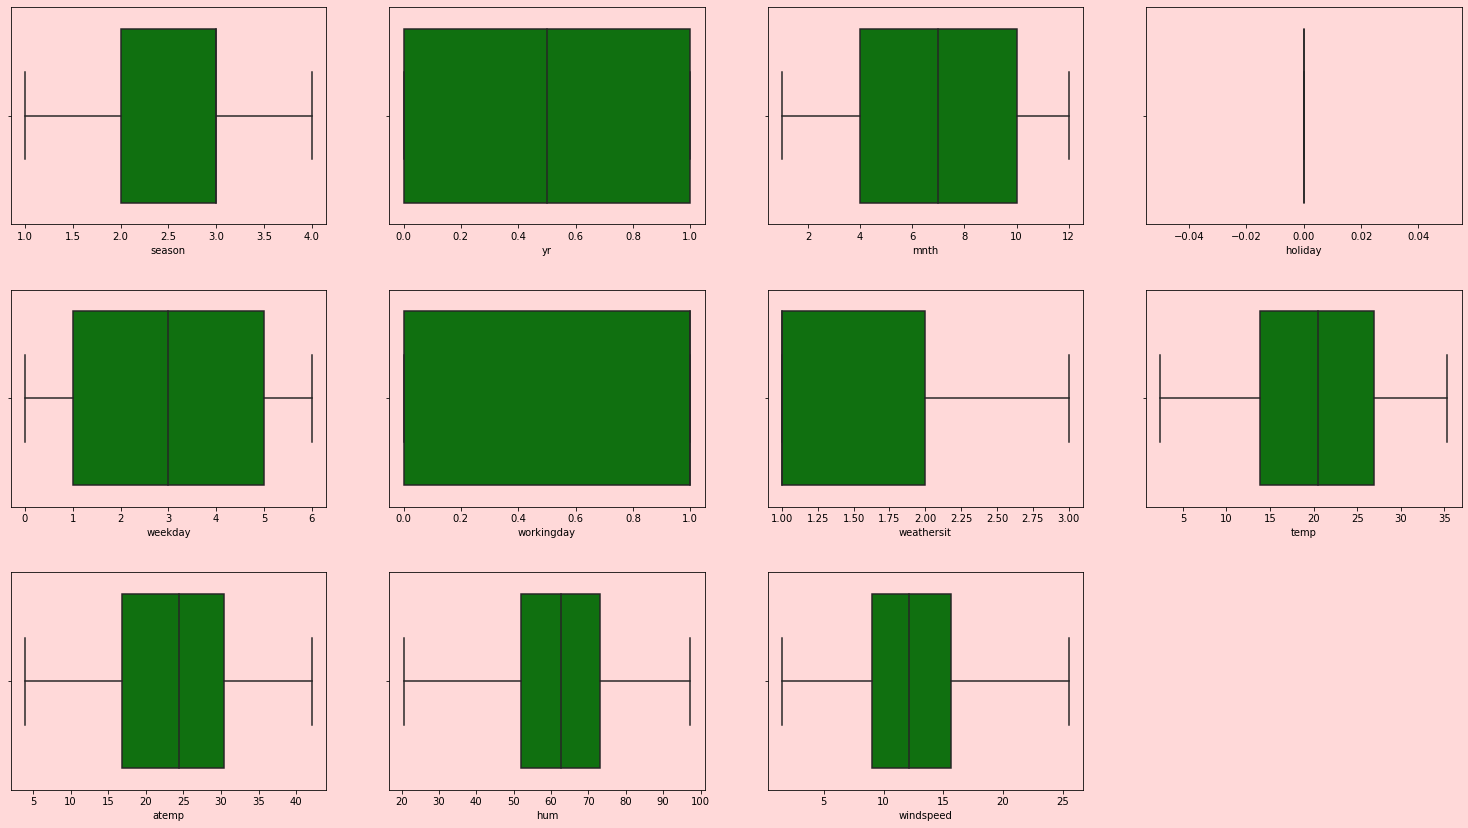

In [14]:
#Creating subplots
fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(6,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11, 
       sec_12]
cnt = 0
for feature in data:
    if data[feature].dtype=='O' or feature=='cnt':
        continue
    else:
        sns.boxplot(x=data[feature], ax=sec[cnt], color='green')
        cnt+=1
# Removing axis and spines
for sec in [sec_12]:
    for location in ['top', 'right', 'bottom','left']:
        sec.spines[location].set_visible(False)
        sec.xaxis.set_visible(False)
        sec.yaxis.set_visible(False)


###### As shown there are NO OUTLIERS

#### CHECK THE NUMBER OF UNIQUE VALUES 
We are checking unique values as we found that the data type of our features are numerical .But we need to identify which among them is continuous numerical feature as we can not apply Multiple Linear Regression on categorical features.

In [15]:
data.nunique()

season          4
yr              2
mnth           12
holiday         1
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           593
windspeed     637
cnt           695
dtype: int64

We see that feature <b>holiday</b> after outlier treatment has only 1 unique value.Hence we will delete the feature as it will have no significance over model building 

In [16]:
## removing feature holiday 
del data['holiday']

In [17]:
rows, columns = data.shape
print(f'The dataset has {rows} rows and {columns} columns including target variable ')


print(f'The target variable is {data.columns[-1]}')

The dataset has 730 rows and 11 columns including target variable 
The target variable is cnt


In [18]:
likely_cat = {}
categorical_feature=[]
numerical_feature=[]
for var in data.columns:
    likely_cat[var] = 1.*data[var].nunique()/data[var].count() < 0.05
for key,value in likely_cat.items():
    if value == True:
        if key != 'cnt':  ##exclude target variable 
            categorical_feature.append(key)
    else:
        if key != 'cnt':  ###exclude target variable 
            numerical_feature.append(key)
print(f'{categorical_feature} are categorical features')
print(f'{numerical_feature} are numerical features')


['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit'] are categorical features
['temp', 'atemp', 'hum', 'windspeed'] are numerical features


In [19]:
# Convert to 'category' data type

data['season']=data['season'].astype('category')
data['yr']=data['yr'].astype('category')
data['mnth']=data['mnth'].astype('category')
data['weekday']=data['weekday'].astype('category')
data['workingday']=data['workingday'].astype('category')
data['weathersit']=data['weathersit'].astype('category')

data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
data.yr.replace({1:"2019", 0:"2018"},inplace = True)
data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
data.workingday.replace({1: 'yes',0:"no"},inplace = True)
data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)




data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,sat,no,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,sun,no,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,mon,yes,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,tue,yes,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,wed,yes,good,9.305237,11.46350,43.6957,12.522300,1600


### DATA TRANSFORMATION AND SCALING AND TRAIN TEST SPLIT 

In [20]:
data = pd.get_dummies(data, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 730 non-null    float64
 1   atemp                730 non-null    float64
 2   hum                  730 non-null    float64
 3   windspeed            730 non-null    float64
 4   cnt                  730 non-null    int64  
 5   season_spring        730 non-null    uint8  
 6   season_summer        730 non-null    uint8  
 7   season_winter        730 non-null    uint8  
 8   yr_2019              730 non-null    uint8  
 9   mnth_aug             730 non-null    uint8  
 10  mnth_dec             730 non-null    uint8  
 11  mnth_feb             730 non-null    uint8  
 12  mnth_jan             730 non-null    uint8  
 13  mnth_jul             730 non-null    uint8  
 14  mnth_jun             730 non-null    uint8  
 15  mnth_mar             730 non-null    uin

In [21]:
#After doing the encoding 

rows, columns = data.shape
print(f'The encoded feature dataset has {rows} rows and {columns} columns')

The encoded feature dataset has 730 rows and 29 columns


#### SPLITING DATASET 

In [22]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.70, test_size = 0.30, random_state = 333)

In [23]:
##test and train shape check 
rows, columns = data_train.shape
print(f'The encoded feature dataset has {rows} rows and {columns} columns')
rows, columns = data_test.shape
print(f'The encoded feature dataset has {rows} rows and {columns} columns')

The encoded feature dataset has 510 rows and 29 columns
The encoded feature dataset has 219 rows and 29 columns


#### RESCALING THE DATASET